<a href="https://colab.research.google.com/github/pkong0414/Deep-Learning-Projects/blob/master/Copy_of_clockAI_Patrick's_Variant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing library

import keras
import os, shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#use this when you use google colab only!
from google.colab import files, drive
import glob
import pandas as pd
import io
import numpy as np
import cv2
from PIL import Image

Created by: Patrick Kong, Cody Hawkings
                
    clockAI project:
    
    This clock ai would aim to use computervision in order to read a clock's time.
    It would be able to read digital and more importantly analog clocks.
    
    We will be using google colab for this project.

###Mounting Google Drive

In [3]:
#to import multiple files into google colab we first need to mount google drive
#so that we can make directory calls to our photos and CSV files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


####A quick check of the files in the directory to see if the drive mounted correctly

In [4]:
!ls "/content/drive/My Drive/"

'Analog Clock'		    RSVP.gform		   train_analog
 battery_report.html.gdoc  'Signup Sheet.gsheet'   train_digital
'Colab Notebooks'	    test_validation.xlsx
 filename_Labels.csv	    text_val_analog.csv


####Directory Calls to Google Drive

In [32]:
#file directory for analog
base_A_dir = "/content/drive/My Drive/train_analog"

#file directory for digital
base_D_dir = "/content/drive/My Drive/train_digital"

#file directory for target (labels)
base_LA_dir = "/content/drive/My Drive/test_val_analog.csv"
base_LD_dir = "/content/drive/My Drive/test_val_digital.csv"


#open files from drive mount in google colab for correct picture names and lables
file_csv = open(base_LA_dir, 'r')
file2_csv = open(base_LD_dir, 'r')


#first we must go through the file and then split the information
#we then remove any unwanted fluff so that we are only left with 
#the filename and the picture label
#the filename will later be used to be joined with the correct directory
#so that we can open up pictures in order
train_A_labels = []
train_A_filenames = []
text_A = []

for files in file_csv:
  text_A = files.split( "," )
  train_A_labels.append( text_A[1].strip( '\n' ) )
  train_A_filenames.append( text_A[0].strip( '\ufeff' ) )
print( train_A_labels )
print( train_A_filenames )



train_D_labels = []
train_D_filenames = []
text_D = []

for files in file2_csv:
  text_D = files.split( "," )
  train_D_labels.append( text_D[1].strip( '\n' ) )
  train_D_filenames.append( text_D[0].strip( '\ufeff' ) )
print( train_D_labels )
print( train_D_filenames )


#Now that the filenames are in correct order we will append the 
#names of the pictures to their respective directory folder

temp2 = []
image_analog = []

for items in train_A_filenames:
  temp2 = os.path.join( base_A_dir, items )
  image_analog.append( temp2 )

print( image_analog[ : ] )


temp3 = []
image_digital = []

for item in train_D_filenames:
  temp3 = os.path.join( base_D_dir, item )
  image_digital.append( temp3 )

print( image_digital[ : ] )

#as a sanity check we print out everything to make sure we are getting the 
#correct files in the correct order and to make sure that the filenames
#appended correctly with the directory paths

['12:00', '12:01', '12:02', '12:03', '12:04', '12:05', '12:06', '12:07', '12:08', '12:09', '12:10', '12:11', '12:12', '12:13', '12:14', '12:15', '12:16', '12:17', '12:18', '12:19', '12:20', '12:21', '12:22', '12:23', '12:24', '12:25', '12:26', '12:27', '12:28', '12:29', '12:30', '12:31', '12:32', '12:33', '12:34', '12:35', '12:36', '12:37', '12:38', '12:39', '12:40', '12:41', '12:42', '12:43', '12:44', '12:45', '12:46', '12:47', '12:48', '12:49', '12:50', '12:51', '12:52', '12:53', '12:54', '12:55', '12:56', '12:57', '12:58', '12:59', '1:00', '1:01', '1:02', '1:03', '1:04', '1:05', '1:06', '1:07', '1:08', '1:09', '1:10', '1:11', '1:12', '1:13', '1:14', '1:15', '1:16', '1:17', '1:18', '1:19', '1:20', '1:21', '1:22', '1:23', '1:24', '1:25', '1:26', '1:27', '1:28', '1:29', '1:30', '1:31', '1:32', '1:33', '1:34', '1:35', '1:36', '1:37', '1:38', '1:39', '1:40', '1:41', '1:42', '1:43', '1:44', '1:45', '1:46', '1:47', '1:48', '1:49', '1:50', '1:51', '1:52', '1:53', '1:54', '1:55', '1:56', '1:

In [45]:
#checking for the correct file length
print( len( image_analog ) )
inputX = np.ndarray(shape=( len( image_analog ), 3, 100, 100, 2, 2 ),
                     dtype=np.float32)

print( inputX.shape )
for items in train_A_filenames:
  temp2 = os.path.join( base_A_dir, items )
  inputX = load_img( temp2 + '.JPG' )
print( inputX.shape )
img = inputX[ 0, :, :, : ]
plt.show( img )
plt.figure()

720
(720, 3, 100, 100, 2, 2)


AttributeError: ignored

In [8]:
#checking for the correct file length
print( len( image_digital ) )

720


TypeError: ignored

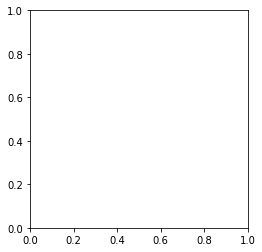

In [34]:
# as a final sanity check we will now open a picture from each directory
img = cv2.imread( image_analog[ 0 ] )
plt.imshow( img )
plt.figure()

img = cv2.imread( image_digital[ 0 ] )
plt.imshow( img )
plt.figure()


In [21]:

img_a = []
image_a = []
for images in image_analog:
  img_a = Image.open(images)
  image_a.append( img_a.resize( ( 100, 100 ), Image.ANTIALIAS) )
plt.imshow( image_a[0] )


FileNotFoundError: ignored

In [0]:
print( len( image_a ) )

720
720


double checking length of the image after the resizing operation.

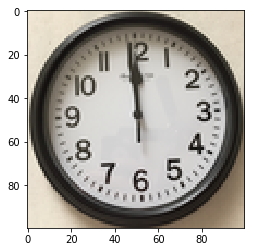

In [0]:
plt.imshow( image_a[719] )

visualizing input in an array format.

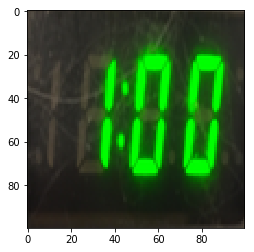

In [0]:
img_d = []
image_d = []
for images in image_digital:
  img_d = Image.open(images)
  image_d.append( img_d.resize( ( 100, 100 ), Image.ANTIALIAS) )
plt.imshow( image_d[0] )

In [0]:
print( len( image_d ) )

printing length of image d after the resizing operation

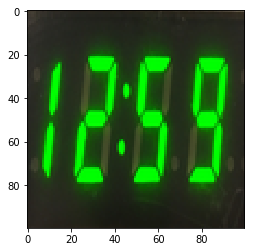

In [0]:
plt.imshow( image_d[719] )

In [0]:
k = 4
num_val_samples = sum([len(image_analog), len(image_digital)]) 
num_epochs = 100
num_scores = []

for i in range( k ):
  print( 'processing fold #', i )
  val_data = images[ i * num_val_samples: (i + 1) * num_val_samples ]
  val_targets = train_targets[ i * num_val_samples: (i + 1) * num_val_samples ]
  
  partial_train_data = np.concatenate(
    [ train_data[ :i * num_val_samples ],
     train_data[ ( i + 1 ) * num_val_samples: ] ],
    axis = 0 )
  
  partial_train_targets = np.concatenate(
    [ train_targets[ :i * num_val_samples ],
     train_targets[ ( i + 1 ) * num_val_samples: ] ],
    axis = 0 )
  
  

This is the k folding snippet we'll use to get our split our training and validation data.

In [0]:
print( len( train_A_labels ) )
print( len( train_D_labels ) )

720
720


Sanity test for the files.

In [0]:
#data gen

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#functions

def annotate_theta( img, labels ):
  #this will be a series of characters read from a label

  time = []
  theta = []
  radius = []
  hour = 0
  minute = 0
  
  
  #this will read from the csv labels and calculate the appropriate theta
  #for the minute hand
  
  #this will read the label and calculate the theta for the
  #hour hand now
  
  for i in range( len( labels ) ):
    
    time = labels[ i ].split( ':' )
    print( time )
    hour = int( time[ 0 ] )
    minute = int( time[ 1 ] )
    radius[ 0 ] = 2
    radius[ 1 ] = 4
    theta[ 0 ] = ( 0.5 * hour )
    theta[ 1 ] = ( 6 * minute )
  
  return radius, theta
  

def load_dataset(img, labels):
  X = []
  
  #once we annotated radius and theta into r and t
  #we will load it into a format of:
  #dataset = [ img, [ r(hour), r(minute) ], [t(hour), t(minute) ] ]
  
  for i in range( len( img ) ):
    r, t = annotate_theta( img[ i ], labels[ i ] )
    print( r )
    print( t )
    X.append( img[i] )
    X.append( r )
    X.append( t )
  
  return X


def residual_unit( inputs, filters, kernel, drop_out = 0.0, pooling = False ):
  res = inputs
  
  if pooling == True:
    res = conv2D( filters, kernel_size = 1, strides = ( 2, 2) )
    inputs = MaxPooling2d( pool_size = ( 2, 2 ) )
    
  inputs = BatchNormalization()( inputs )
  inputs = conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = activation( "relu" )( inputs )
  inputs = Dropout( drop_out )( inputs )
  inputs = BatchNormalization( inputs )
  inputs = conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = activation( "relu" )( inputs )
  
  inputs = keras.layers.add( [ inputs, res ] )
  
  return inputs

#main function

print( train_A_labels[ 0 ] )
print( len( train_A_labels[ 0 ] ) )
#use this later to output check

X = [ [], [ 2 ], [ 2 ] ]
time = []
theta = [ 0, 0 ]
radius = [ 2 , 4 ]
hour = 0
minute = 0


#this will read from the csv labels and calculate the appropriate theta
#for the minute hand
  
#this will read the label and calculate the theta for the
#hour hand now
  
for i in range( len( train_A_labels ) ):
    
  time = train_A_labels[ i ].split( ':' )
  #print( time )
  hour = int( time[ 0 ] )
  minute = int( time[ 1 ] )
  if hour == 12:
    hour = 0
  theta[ 0 ] = ( 0.5 * minute )
  theta[ 1 ] = ( 6 * minute )
  print( radius )
  print( theta )
  


#using callback to save a clock AI on best validation.
#model.save('clock_ai_0.1.h5')


12:00
5
[2, 4]
[0.0, 0]
[2, 4]
[0.0, 6]
[2, 4]
[0.0, 12]
[2, 4]
[0.0, 18]
[2, 4]
[0.0, 24]
[2, 4]
[0.0, 30]
[2, 4]
[0.0, 36]
[2, 4]
[0.0, 42]
[2, 4]
[0.0, 48]
[2, 4]
[0.0, 54]
[2, 4]
[0.0, 60]
[2, 4]
[0.0, 66]
[2, 4]
[0.0, 72]
[2, 4]
[0.0, 78]
[2, 4]
[0.0, 84]
[2, 4]
[0.0, 90]
[2, 4]
[0.0, 96]
[2, 4]
[0.0, 102]
[2, 4]
[0.0, 108]
[2, 4]
[0.0, 114]
[2, 4]
[0.0, 120]
[2, 4]
[0.0, 126]
[2, 4]
[0.0, 132]
[2, 4]
[0.0, 138]
[2, 4]
[0.0, 144]
[2, 4]
[0.0, 150]
[2, 4]
[0.0, 156]
[2, 4]
[0.0, 162]
[2, 4]
[0.0, 168]
[2, 4]
[0.0, 174]
[2, 4]
[0.0, 180]
[2, 4]
[0.0, 186]
[2, 4]
[0.0, 192]
[2, 4]
[0.0, 198]
[2, 4]
[0.0, 204]
[2, 4]
[0.0, 210]
[2, 4]
[0.0, 216]
[2, 4]
[0.0, 222]
[2, 4]
[0.0, 228]
[2, 4]
[0.0, 234]
[2, 4]
[0.0, 240]
[2, 4]
[0.0, 246]
[2, 4]
[0.0, 252]
[2, 4]
[0.0, 258]
[2, 4]
[0.0, 264]
[2, 4]
[0.0, 270]
[2, 4]
[0.0, 276]
[2, 4]
[0.0, 282]
[2, 4]
[0.0, 288]
[2, 4]
[0.0, 294]
[2, 4]
[0.0, 300]
[2, 4]
[0.0, 306]
[2, 4]
[0.0, 312]
[2, 4]
[0.0, 318]
[2, 4]
[0.0, 324]
[2, 4]
[0.0, 330]
[2,

TypeError: ignored

Gameplan is to use polar coordinates in order to give an additional feature to the learning model during training.

Initially considered using pixels to calculate theta since arctan( y / x ) will give us the angle of the clock hand.
However, since the pixels were blurry compounded by the fact that the conditions to make theta happen is complex, an alternative was considered.

Rather than use X and Y to calculate theta, the idea is then to use degree of 360 and divide by units of 60 ( which represent the minutes ). This gives us 6 degrees of movement per ***"minute"***.

For the ***"Hour"*** hand we know that the hand moves 5 minute units to move to the next hour. 5 * 6 gives us 30 degrees per hour, so if we take 30 degree /60 minutes we get 0.5 degrees/minute.

Same idea will be applied to the hour-hand cause this would be the one that gives the model problem since the hour-hand moves as the minute hand moves and makes things a little harder to do for the hour identification.

( 4/29/19 )

*added k folding so we can get our training and validation split accordingly for the small sample size

*added residual unit function which will allow us to make residual units with dropout and pooling capabilities

*added annotation function which will generate the other portion of input the network will be using to learn

*Data generator has been added but hasn't been customized to work with this problem

